## MTH9831 Assignment 2

**Author: Boyu Yang, Julius Gruber, Yicheng Sun, Ziyuan Li**

### Question 1

From **Theorem 1.7**, we know that
$$
P(B^*(t) \geq a, B(t) \leq x) = 1 - N(\frac{2a - x}{\sqrt{t}})
$$
Then the cumulative distribution function of $(B(t), B^*(t))$ is
$$
\begin{align*}
F(a,x) &= P(B^*(t) \leq a, B(t) \leq x) = P(B(t)\leq x) - P(B^*(t) \geq a, B(t) \leq x) \\
 &= \int_{-\infty}^x \cfrac{1}{\sqrt{2\pi t}}e^{-\frac{x^2}{2t}}dx - (1-N(\cfrac{2a - x}{\sqrt{t}}))
\end{align*}
$$
So the joint density of $(B(t), B^*(t))$ is 
$$
f(x, a) = \frac{\partial^2 F}{\partial x \partial a} = \cfrac{2(2a-x)}{t^{3/2}}\phi(\cfrac{2a-x}{\sqrt{t}}),x\leq a, a> 0
$$
where $\phi(x)$ is the standard normal density function.


### Question 2

To start with
$$
\limsup_{t\to0^+} \frac{|B(t)|}{\sqrt{2t\ln\ln(1/t)}} = \limsup_{s\to+\infty} \frac{|B(s^{-1})|}{\sqrt{(2/s)\ln\ln(s)}} = \limsup_{s\to+\infty} \frac{|sB(s^{-1})|}{\sqrt{2s\ln\ln(s)}}
$$

According to part (iii) of Theorem 2.1, $B^*(t) = tB(t^{-1})$ is a Brownian motion. By using law of iterated logatithm
$$
\limsup_{s\to\infty}\frac{B(s)}{\sqrt{2s\ln\ln(s)}} = 1 \quad a.s.
$$

since we have
$$
|sB(s^{-1})| = max(B^*(s), -B^*(s))
$$

both of which are Brownian motion, so we can conclude that
$$
\begin{align*}
\limsup_{s\to+\infty} \frac{|sB(s^{-1})|}{\sqrt{2s\ln\ln(s)}} &= \limsup_{s\to+\infty} \frac{max(B^*(s), -B^*(s))}{\sqrt{2s\ln\ln(s)}} \\
&= max(\limsup_{s\to\infty}\frac{B^*(s)}{\sqrt{2s\ln\ln(s)}}, \limsup_{s\to\infty}\frac{-B^*(s)}{\sqrt{2s\ln\ln(s)}}) \\
&= 1 \quad a.s
\end{align*}
$$

### Question 3

(a) Denote $\tau:=\tau_{-a} \wedge \tau_{b}$, $\tau$ is a stopping time since it adaptable to past information. Since $B(t)$ is a martingale, we can know that
$$
\mathbb{E}(B(\tau)) = \mathbb{E}(B(0)) = 0
$$
$$
\mathbb{E}(B(\tau)) = -aP(B(\tau) = -a) + bP(B(\tau) = b) = -aP(\tau_{-a} < \tau_b) + b(1-P(\tau_{-a} < \tau_b))
$$
$$
\Rightarrow P(\tau_{-a} < \tau_b) = \frac{b}{a + b}
$$

(b) 


To calculate $\mathbb{E}(\tau_{-a} \wedge \tau_{b}) = \mathbb{E}(\tau)$, we construct the martingale $B^2(t) - t$. Since it's a martingale, we know that
$$
\mathbb{E}(B^2(\tau) - \tau) = \mathbb{E}(B^2(0) - 0) = 0.
$$
$$
\Rightarrow \mathbb{E}(B^2(\tau)) = a^2P(\tau_{-a} < \tau_b) + b^2(1-P(\tau_{-a} < \tau_b)) = ab.
$$
$$
\Rightarrow x\mathbb{E}(\tau_{-a} \wedge \tau_{b}) = \mathbb{E}(\tau) = \mathbb{E}(B^2(\tau)) = ab
$$
					

### Question 4

### (i)
1) $\mathbb{E}[|Z(t)|] = \mathbb{E}[Z(t)] = 1 < \infty$ 
2) $Z(t)$ is $\mathcal F$-measurable
3) for $s\le t$, we have
$$
\begin{align*}
\mathbb{E}[Z(t)|\mathcal F(s)] &= \mathbb{E}[exp\{\sigma X(t) - (\sigma\mu + \frac{1}{2}\sigma^2)t\}|\mathcal F(s)] \\
&= Z(s)\mathbb{E}[exp\{\sigma(X(t)-X(s)) - (\sigma\mu + \frac{1}{2}\sigma^2)(t-s)\}|\mathcal F(s)] \\
&= Z(s)\mathbb{E}[exp\{\sigma(X(t)-X(s)) - (\sigma\mu + \frac{1}{2}\sigma^2)(t-s)\}] \\
&= Z(s)exp\{-(\sigma\mu + \frac{1}{2}\sigma^2)(t-s)\}\mathbb{E}[exp\{\sigma(X(t)-X(s))\}] \\
&= Z(s)
\end{align*}
$$

Here we use the property: 
</br> (i) $X(t)-X(s)$ is independent with $\mathcal F(s)$
</br> (ii) $X(t)-X(s)$ ～ $N(\mu t, \sqrt{t-s})$

so we can conclude $Z(t)$ is a martingale

### (ii)
$Z(t\wedge\tau_{m})$ is a stopped martingale. so we have
$$
1 = Z(0) = Z(t\wedge\tau_{m}) = \mathbb{E}[exp\{\sigma X(t\wedge\tau_{m}) - (\sigma\mu + \frac{1}{2}\sigma^2)(t\wedge\tau_{m})\}], \quad t\ge0
$$

### (iii)
since we have 
$$
0\le exp\{\sigma X(t\wedge\tau_{m})\}\le e^{\sigma m}
$$
which is bounded. take limit on both sides of the equation in (ii), we get
$$
\lim_{t\to\infty}exp\{\sigma X(t\wedge\tau_{m}) - (\sigma\mu + \frac{1}{2}\sigma^2)(t\wedge\tau_{m})\} = \mathbb{I}_{(\tau < \infty)}exp\{\sigma m-(\sigma\mu + \frac{1}{2}\sigma^2)\tau_{m}\}
$$
so we have
$$
\mathbb{E}[exp\{\sigma m-(\sigma\mu + \frac{1}{2}\sigma^2)\tau_{m}\}\mathbb{I}_{(\tau < \infty)}] = 1 \\
\mathbb{E}[exp\{-(\sigma\mu + \frac{1}{2}\sigma^2)\tau_{m}\}\mathbb{I}_{(\tau < \infty)}] = e^{-\sigma m}
$$
take limit on both sides as $\sigma\to 0$, we get $\mathbb{E}[\tau_m < \infty] = 1$, equivalently
$$
\mathbb{P}[\tau_m < \infty] = 1
$$
so we have
$$
\mathbb{E}[exp\{-(\sigma\mu + \frac{1}{2}\sigma^2)\tau_{m}\}] = e^{-\sigma m}
$$
set $\alpha = (\sigma\mu + \frac{1}{2}\sigma^2)$, since $\sigma$ is positive, then we get $\sigma = -\mu + \sqrt{2\alpha + \mu^2}$. 
</br> so for all $\alpha > 0$, we have
$$
\mathbb{E}[e^{-\alpha\tau_{m}}] = e^{m\mu-m\sqrt{2\alpha + \mu^2}}
$$

### (iv)
take derivative with respect to $\alpha$, then we have
$$
\mathbb{E}[\tau_m e^{-\alpha\tau_{m}}] = \frac{m}{\sqrt{2\alpha+\mu^2}}e^{m\mu-m\sqrt{2\alpha + \mu^2}}
$$
let $\alpha\to0$, we get 
$$
\mathbb{E}[\tau_m] = \frac{m}{\mu}
$$

### (v)
for $\sigma > -2\mu$, we have $\sigma\mu + \frac{1}{2}\sigma^2 > 0$. so similar as before, we have
$$
\mathbb{E}[exp\{\sigma m-(\sigma\mu + \frac{1}{2}\sigma^2)\tau_{m}\}\mathbb{I}_{(\tau < \infty)}] = 1 \\
\mathbb{E}[exp\{-(\sigma\mu + \frac{1}{2}\sigma^2)\tau_{m}\}\mathbb{I}_{(\tau < \infty)}] = e^{-\sigma m}
$$
and then get



1. Note that $W(t) \sim \mathcal{N}(0,t)$ and 
$$
Z(t) = \exp\left\{\sigma W(t) - \frac{1}{2}\sigma^2t\right\},
$$
we can obtain that
$$
\mathbb{E}|Z(t)| = \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi t}}e^{-\frac{w^2}{2t}}\cdot\exp\left\{\sigma w - \frac{1}{2}\sigma^2t\right\}dw=1<\infty.
$$
2. $Z(t)$ is $\mathcal{F}_t$-measurable because $Z(t)$ can be seen as a continuous function of $W(t)$ which is $\mathcal{F}_t$-measurable by definition.
3. For any $t\geq s\geq0$, we have
$$
\begin{align*}
\mathbb{E}[Z(t)|W(s)] &= e^{\sigma W(s)}\mathbb{E}[\exp\left\{\sigma (W(t) - W(s))- \frac{1}{2}\sigma^2t\right\}|W(s)]\\
&= e^{\sigma W(s)}\mathbb{E}[\exp\left\{\sigma (W(t) - W(s))- \frac{1}{2}\sigma^2t\right\}]\\
&= e^{\sigma W(s)}\int_{\mathbb{R}}\frac{1}{\sqrt{2\pi (t-s)}}e^{-\frac{w^2}{2(t-s)}}\cdot\exp\left\{\sigma w - \frac{1}{2}\sigma^2t\right\}dw\\
&= e^{\sigma W(s)}\exp\left\{\frac{\sigma^2}{2}(t-s) - \frac{1}{2}\sigma^2t\right\}dw\\
&= \exp\left\{\sigma W(s) - \frac{1}{2}\sigma^2s\right\} = Z(s)\\
\end{align*}
$$

By 1-3, we conclude that W(t) is a martingale with respect to $\mathcal{F}_t$.


### Question 5

For $f(x) = x^2$, we know that 
$$ v(t,x)= u(T - t, x) = E[B(T - t)^2 | B(0)=x]$$

in which $B(T - t)$ is normal distributed with mean x and variance T - t.

We then see:
$$ v(t,x) = E[B(T - t)^2 | B(0)=x] = E[B(T - t)^2|B(0)=x] = E[B(T - t)]^2 + Var(B(T - t)) = x^2 + T - t$$


For $f(x) = e^x$ , we know that 
$$ v(t,x)= u(T - t, x) = E[e^B(T - t)| B(0)=x]$$

which implies 
$$ E[e^{x + t(T - t)}] = \int _{\infty}^{\infty} e^{x + z (T - t)} e^{-z^2/2} dz = \frac{1}{\sqrt{2\pi}} e^x \int _{\infty}^{\infty} e^{z (T - t)}e^{-z^2/2} dz$$

Now we need to complete the squares:
$$\frac{1}{2} (z^2 - 2 (T - t) z) = \frac{1}{2} (z^2 - 2  (T - t) z +  (T - t)^{2}) - \frac{1}{2}  (T - t)^{2} $$

$$ \frac{1}{2} (z - \sigma)^2 - \frac{1}{2} \sigma^{2}$$

Hence, the previous terms equals:
$$\frac{1}{\sqrt{2\pi}} e^{(x + (T - t)^2)/2} \int _{\infty}^{\infty} e^{- (z- (T - t))^2/2} dz=e^{x + (T-t)^2/2}$$

### Question 6

##### (i) Show that X is a martingale relative to its natural filtration F(t), t ≥ 0
Because the distribution of $X(s + t) - X(s)$ is the same as that of $X(t)$:
\begin{align*}
E[X(t)|F(s)] &= E[X(t) - X(s) + X(s)|F(s)] \\
&= E[X(t) - X(s)] + E[X(s)|F(s)] \quad \text{(independence of increments)} \\
&= 0 + E[X(s)|F(s)] \quad \text{(distributions are symmetric around 0)} \\
&= E[X(s)|F(s)] \\
&= X(s)
\end{align*} 

##### (ii) Show that $E[X^2(t + s) - X^2(s)| F(s)] = v(t)$ for all $s, t \geq 0$:

\begin{align*}
E[X^2(t + s) - X^2(s)| F(s)] &= E[(X(t + s) - X(s))(X(t + s) + X(s))| F(s)] \\
&= E[(X(t + s) - X(s))X(t + s) + (X(t + s) - X(s))X(s)| F(s)] \\
&= E[(X(t + s) - X(s))X(t + s)| F(s)] \text{ (independence of increments)} \\
&= E[(X(t + s) - X(s))(X(t + s) - X(s) + X(s))| F(s)] \\
&= \text{Var}[(X(t + s) - X(s))| F(s)] \\
&= \text{Var}[(X(t + s) - X(s))] \\
&= v(t)
\end{align*}

##### (iii) Show that $v(t) + v(r) = v(t + r)$ for all $t, r \geq 0$:

\begin{align*}
\text{Var}[X(t + r)] &= E[X(t + r)^2] \\
&= E[(X(t + r) - X(r) + X(r))(X(t + r) - X(r) + X(r))] \\
&= E[((X(t + r) - X(r))^2 + X(r)^2)] \\
&= \text{Var}(t) + \text{Var}(r) \\
&= v(t) + v(r)
\end{align*}

##### (iv) Argue that monotonicity and (iii) imply that there is a constant $\sigma \geq 0$ such that $v(t) = \sigma^2 t$ for all $t \geq 0$. Hint: show this first for $t \in \mathbb{N}$, then for $t \in \mathbb{Q}$, and then use monotonicity to extend to all $t \geq 0$.

1. Show $v(t) = \sigma^2 t$ for all $t \in \mathbb{N}$:

    Because of (iii), we can see $v(n) = n v(1)$ for all $n \in \mathbb{N}$.

2. Show if $t \in \mathbb{Q}$, then $t = \frac{p}{q}$, where $p$ and $q$ are positive integers:

    $v(t) = v\left(\frac{p}{q}\right) = q v\left(\frac{p}{q}\right) = p v\left(\frac{1}{q}\right) = p\sigma^2 \left(\frac{1}{q}\right) = \sigma^2 \left(\frac{p}{q}\right) = \sigma^2 t$ for all $t \in \mathbb{Q}$.

3. Show $v(t) = \sigma^2 t$ for all $t \geq 0$:

    For any $t \geq 0$, we can find a sequence of rational numbers $\{t_n\}$ such that 

    $t_n \rightarrow t$ as $n \rightarrow \infty$. 
    
    Then, using the continuity of $v$ and the previous step, we have

    $\v(t) = \lim_{n \to \infty} v(t_n) = \lim_{n \to \infty} \sigma^2 t_n = \sigma^2 \lim_{n \to \infty} t_n = \sigma^2 t \text{ for all } t \geq 0.$

Therefore, we have shown that there is a constant $\sigma \geq 0$ such that $v(t) = \sigma^2 t$ for all $t \geq 0$.


##### (v) Argue that $X = \sigma B$, where $B$ is a standard Brownian motion.

For any $n \in \mathbb{N}$, we construct a sequence such that 

$t_0 = 0, t_1 = \frac{t}{n}, t_2 = \frac{2t}{n}, \ldots, t_n = t$.

$X(t) = X(t_1 - t_0) + X(t_2 - t_1) + \ldots + X(t_n - t_{n-1}) = \sum_{i=1}^{n} X_i$

where $X(t_1 - t_0), X(t_2 - t_1), \ldots, X(t_n - t_{n-1})$ are independent and identically distributed random variables with $\mathbb{E} = 0$ and $\text{Var} = \sigma^2 \frac{t}{n}$.

So, as $n$ approaches infinity,

$X = \sum_{i=1}^{\infty} X_i$ is asymptotically a normal distribution with $\mathbb{E} = 0$ and $\text{Var} = \sigma^2 t$.

Therefore, we can conclude that $X = \sigma B$, where $B$ is a standard Brownian motion.




### Question 7

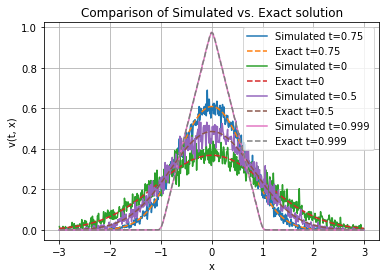

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

def f(x):
    """End state function for f(x)

    Args:
        x (float): outputs the end state function f(x)

    Returns:
        float: output of the function
    """
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def brownian_motion(x, t):
    """Simulates a Brownian Motion step

    Args:
        x (_type_): current location of the partical
        t (_type_): stepsize of the particle

    Returns:
        float : return the next step of the Brownian motion
    """
    return x + np.sqrt(t) * np.random.normal(0, 1) 

def approximate_v(t, x, num_samples):
    """approximate v at given time with given number of samples

    Args:
        t (float): current time step
        x (float): current location
        num_samples (float): number of samples to create

    Returns:
        float: _description_
    """
    #similar to the expected value expression like in formula 4.2
    return np.mean([f(brownian_motion(x, 1-t)) for _ in range(num_samples)]) 

def exact_solution(t, x):
    """Calculates the exact solution given the density function

    Args:
        t (float): current time location
        x (float): current physical location

    Returns:
        float: exact solution of the equation at the state
    """
    density = lambda y: norm.pdf(y, loc=x, scale=np.sqrt(1-t))
    y_vals = np.linspace(-3, 3, 500)# range for integration, can be adjusted if needed
    dy = y_vals[1] - y_vals[0]
    return np.sum(f(y_vals) * density(y_vals) * dy)

#set the range to look at
l = 3

#create a discretization
x_vals = np.arange(-l, l, 0.01)

#number of samples to calculate at each timestep
num_samples = 100

#iterate through different t sizes
for t in [0.75, 0, 0.5,0.999]:

    #calculate the approximations for different values of x and store in a list
    approximations = [approximate_v(t, x, num_samples) for x in x_vals] # list of means

    #get the exact solutions and store them in a list
    exact_values = [exact_solution(t, x) for x in x_vals]

    #plot the values against each other
    plt.plot(x_vals, approximations, label=f'Simulated t={t}')

    plt.plot(x_vals, exact_values, linestyle='dashed', label=f'Exact t={t}')

plt.legend()
plt.title('Comparison of Simulated vs. Exact solution')
plt.xlabel('x')
plt.ylabel('v(t, x)')
plt.grid(True)
plt.show()